#                                   Statistical Methods For Decision Making

In [ ]:
# sample - subset of population
# sample mean,sample variance,sample standard deviation may or may not represent population standard deviation,population mean,population variance
# Hypothesis - assuming that smaple mean,sample variance etc. matches with the population mean, population stard deviation.

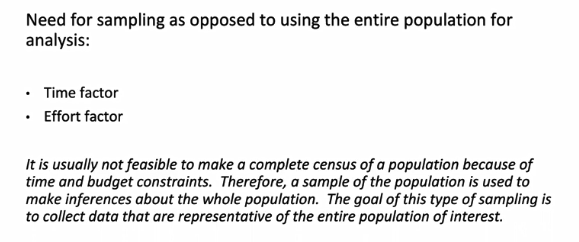

#  Normal Distribution -2

In [ ]:
# central limit theorem - Mean values of various samples taken from a population will be normal.
# independent random variable e.g. sweetness of a fruit Juice, likability of a product,usability of a product 
# rating from 1 to 10

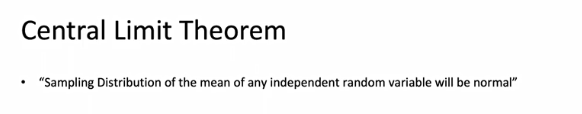

# Hypothesis Testing

In [ ]:
# hypothesis - intuition or observation that has to be proven.
# Hypothesis - Either you reject it or does not reject it. No conclusive evidence to accept it.
# null hypothesis -- Not deviate from normally observed or status quo
# Alternative hypothesis - deviate from normally obeserved status quo
# e.g. a coca cola bottle normall contains 500 ml with deviation from 10% i.e. 450 ml to 550 ml is a null hypothesis
# Alternative hypothesis is the bottle contains < 450 ml or > 550 ml 
# e.g. null hypothesis -- atleast 90% of customers pay before due date
# alternative hypothesis -- more than 10% of customers pay after due date

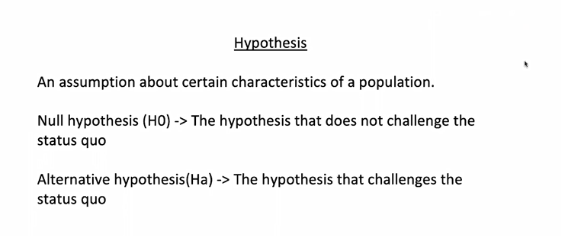

# Type 1 and Type 2 Errors

In [ ]:
# Type 1 error- reject NULL hypothesis where it should not be rejected.
# Type 2 error - Fail to reject null hypothesis where is should have been rejected.

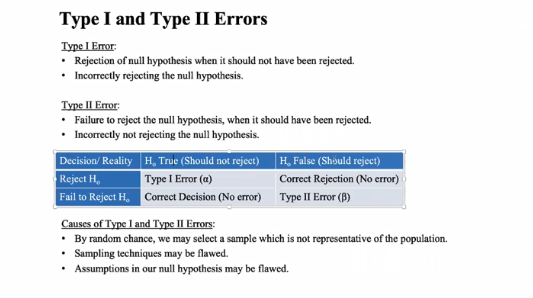

# Types Of Hypothesis Tests

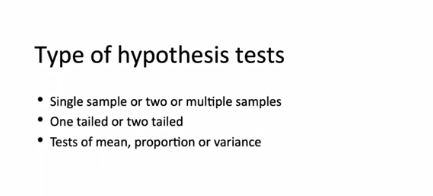

# Confidence Intervals

In [ ]:
# confidence level -- if an experiment is conducted n number of times, the acceptable range is 95% of all times
# level of significance -- 1- confidence level.
# based on confidence level , confidence intervals are defined , say when coin is tossed 1000 times and 500 times 
# heads has to turn up with range 450 to 550 +/- 10% then fail to reject null hypothesis else for e.g. 425 then
# reject null hypothesis.
# another example say for two tail test i.e. null hypothesis = 600ml +/- 10% i.e. acceptable range 540 ml to 660 ml
# region < 540 and > 660 reject.
# one tail test for same example mean 600 ml with 10% range then null hypothesis <= 660 ml else reject when > 660ml
# level of significance 0.05 -- probability that we reject null hypothesis when true.

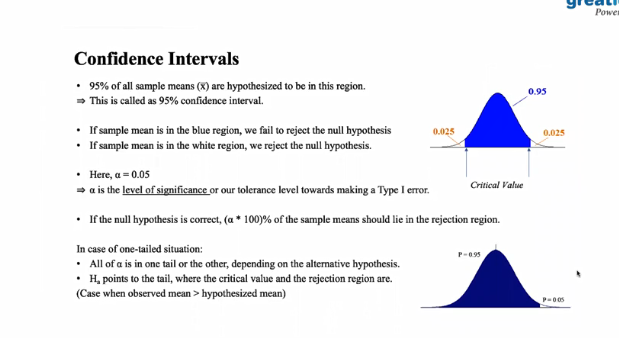

# Examples on Hypothesis testing.

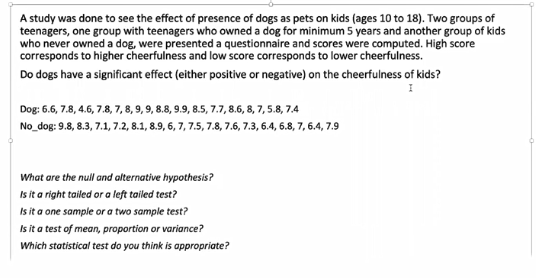

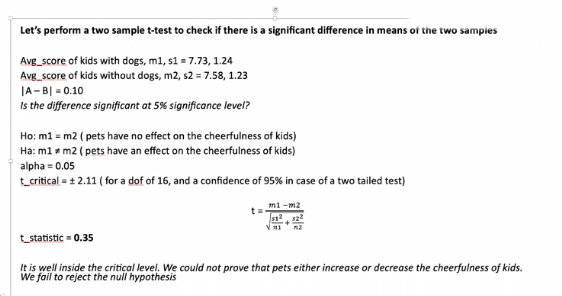

In [26]:
# Python code
# The value above 0.35 might not be correct and hence calculated value for t_statistic 0.66 which is with in the range
# of t_critical for 95% confidence level for 16 degress of freedom +/- 2.11.
# null hypothesis that having dog does not have any effect on cheerfullness is not rejected.

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats,t
a= np.array([6.6,7.8,4.6,7.8,7,8,9,9,8.8,9.9,8.5,7.7,8.6,8,7,5.8,7.4])
b=np.array([9.8,8.3,7.1,7.2,8.1,8.9,6,7,7.5,7.8,7.6,7.3,6.4,6.8,7,6.4,7.9])
# python built in function
t1, p1 = ttest_ind(a,b,equal_var=False)
print(t1)
print(p1)

# By formula calculation
s1=a.std()
s2=b.std()
s = np.sqrt((pow(s1,2)/(a.size-1)) + (pow(s2,2)/(b.size-1)))
tstat=(a.mean()-b.mean())/s
print(tstat)
p2 = 2 * t.cdf(-abs(tstat), df=32) # df= degrees of freedom . total number of values - 2  i.e. a.size-1+b.size-1
print(p2)

0.6665710337435845
0.5102377358506931
0.6665710337435845
0.5098239300755949


# Example 2

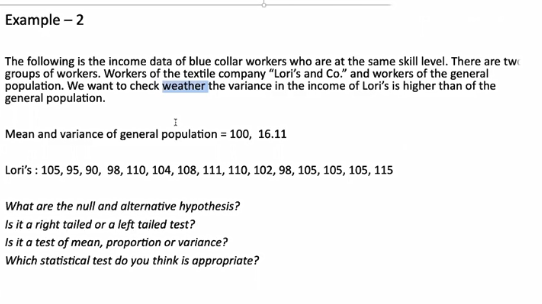

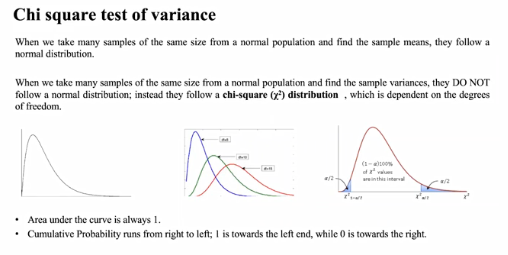

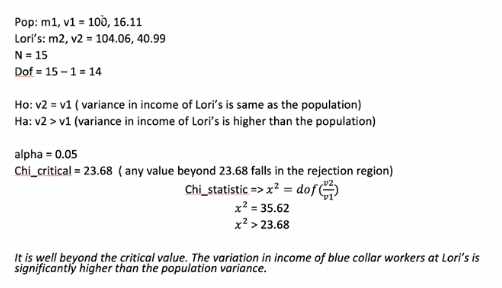

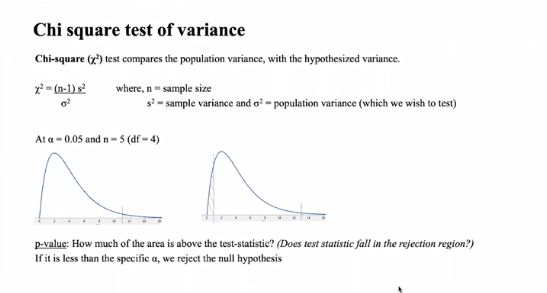

In [65]:
# python code
# chi_statistic is far higher than chi_critical from chi_distribution table of get from python built in code
# we reject null hypothesis that Lori's income variance does not differ with population income variance
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats,t,chisquare,chi2,chi2_contingency

Lo= np.array([100,95,90,98,110,104,108,111,110,102,98,105,105,105,115]) # actual values
#pop=np.array([100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]) # expected

m1,v1=100,16.11
pop= np.sqrt(v1) * np.random.randn(15) + m1
n=15
dof=14
m2=Lo.mean()
v2=Lo.var()
print(m2,v2)
chi_statistic1 = dof*(v2/v1)
print(chi_statistic1)
# python built in function
chi_critical = chi2.ppf(0.95, dof) # 95% confidence level
#chi_statistic2, p = chisquare(Lo)
print(chi_critical)
#chi_statistic2, p = chisquare(Lo,pop)
#print(chi_statistic2)
#print(pop)
#print(pop.mean())
#print(pop.var())

103.73333333333333 41.928888888888885
36.437271535967994
23.684791304840576


# Example 3

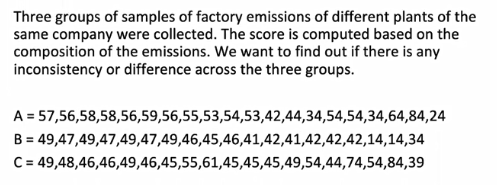

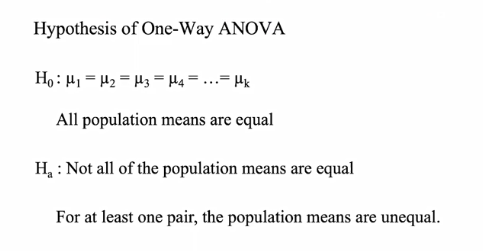

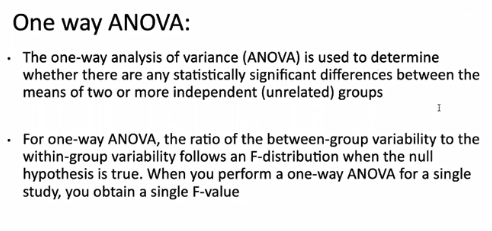

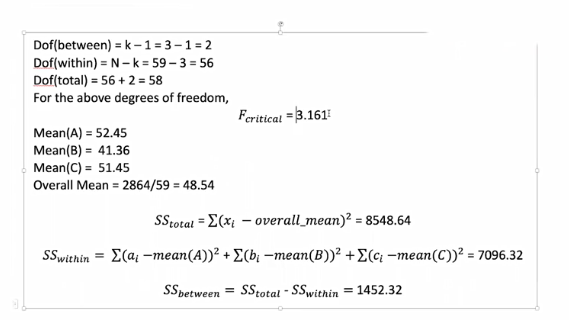

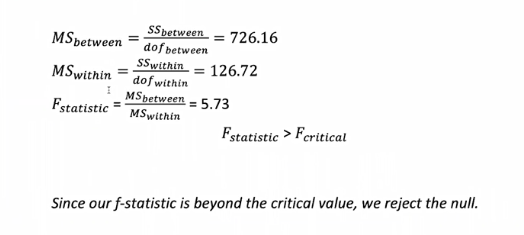

In [89]:
# python code
# f_statistic is way beyond f_critical and hence we reject null hypothesis that all means are equal
import numpy as np
from scipy.stats import f_oneway,f
a=np.array([57,56,58,58,56,59,56,55,53,54,53,42,44,34,54,54,34,64,84,24])
b=np.array([49,47,49,47,49,47,49,46,45,46,41,42,41,42,42,42,14,14,34])
c=np.array([49,48,46,46,49,46,45,55,61,45,45,45,49,54,44,74,54,84,39])
f_statistic1,pvalue1=f_oneway(a,b,c)
print(f_statistic1,pvalue1)
f_critical=f.ppf(0.95,2,56) # 0.95 confidence level or 1-alpha i.e. 1-0.05, 2- number of groups-1 i.e. 3-1
#56 total values 59-3 = 56
print(f_critical)
# manual calculation
a_m=a.mean()
b_m=b.mean()
c_m=c.mean()
tot=np.concatenate((a,b,c))
overall_m=tot.mean()
print(a_m,b_m,c_m,overall_m)
sstot=sum(np.square(tot-overall_m))
sswithin=sum(np.square(a-a_m)) + sum(np.square(b-b_m))+sum(np.square(c-c_m))
ssbetween=sstot-sswithin
print(sstot,sswithin,ssbetween)
MSbet=ssbetween/2
MSwithin=sswithin/56
f_statistic=MSbet/MSwithin
print(f_statistic)

5.605295675427708 0.0060879156389451235
3.161861164913022
52.45 41.36842105263158 51.473684210526315 48.5
8542.5 7096.107894736842 1446.3921052631576
5.707210142253666


# Example 4

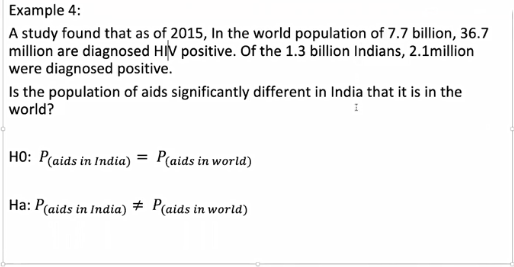

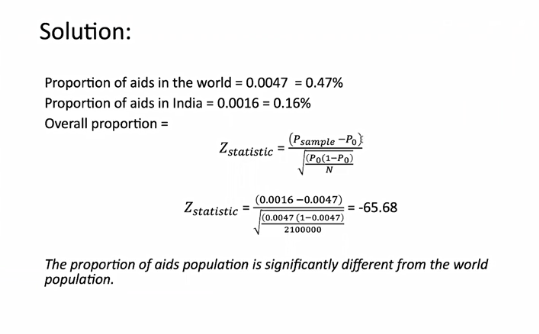

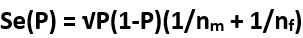

In [70]:
# python code
p1=2.1*pow(10,6)/(1.3*pow(10,9))
print(p1)
p0=36.7*pow(10,6)/(7.7*pow(10,9))
print(p0)
Zstat=(p1-p0)/np.sqrt(p0*(1-p0)/2100000)
print(Zstat)

0.0016153846153846153
0.0047662337662337665
-66.29595608925864
